<a href="https://colab.research.google.com/github/brl0/brl0-stuff/blob/master/pytorch_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch testing.

In [0]:
%matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt

In [0]:
!pip install numpy torch torchvision

from __future__ import print_function
import torch
x = torch.rand(5, 3)
print(x)

import torch
print(torch.cuda.is_available())

# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[0.0259, 0.4988, 0.5238],
        [0.0534, 0.7924, 0.8793],
        [0.3304, 0.8413, 0.4250],
        [0.4809, 0.1805, 0.6544],
        [0.1720, 0.9261, 0.8649]])
True
tensor([[1.0259, 1.4988, 1.5238],
        [1.0534, 1.7924, 1.8793],
        [1.3304, 1.8413, 1.4250],
        [1.4809, 1.1805, 1.6544],
        [1.1720, 1.9261, 1.8649]], device='cuda:0')
tensor([[1.0259, 1.4988, 1.5238],
        [1.0534, 1.7924, 1.8793],
        [1.3304, 1.8413, 1.4250],
        [1.4809, 1.1805, 1.6544],
        [1.1720, 1.9261, 1.8649]], dtype=torch.float64)


In [0]:
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [0]:
%%time
learning_rate = 1e-4
loops = 500
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    #torch.nn.Linear(H, H),
    #torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
l = 0
for t in range(loops):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    l = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(l)

7.89971252856958e-08
CPU times: user 981 ms, sys: 39.9 ms, total: 1.02 s
Wall time: 1.04 s


In [0]:
%%time
learning_rate = 1e-4
loops = 500
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    #torch.nn.Linear(H, H),
    #torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
l = 0
for t in range(loops):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    l = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(l)

4.527484875893606e-08
CPU times: user 912 ms, sys: 36.9 ms, total: 949 ms
Wall time: 970 ms


In [0]:
%%time
learning_rate = 1e-4
loops = 500
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
l = 0
for t in range(loops):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    l = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(l)

3.1339297379417985e-08
CPU times: user 1.07 s, sys: 43.7 ms, total: 1.11 s
Wall time: 1.13 s


2.0604405293056516e-08
CPU times: user 1.23 s, sys: 47.3 ms, total: 1.28 s
Wall time: 1.29 s


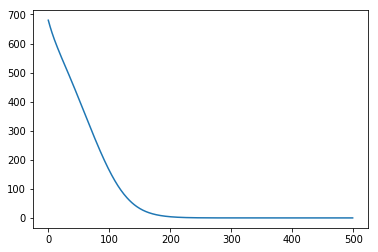

In [0]:
%%time
learning_rate = 1e-4
loops = 500
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
l = []
for t in range(loops):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    l.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(l[-1])
plt.plot(l)

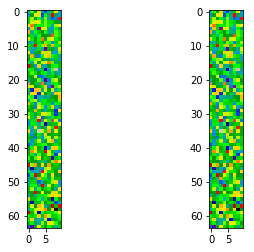

In [0]:
cmap = 'nipy_spectral'
norm = mp.colors.Normalize(vmin=y.min(), vmax=y.max())
plt.subplot(1, 2, 1)
plt.imshow(y, cmap=cmap, norm=norm)
plt.subplot(1, 2, 2)
plt.imshow(model(x).detach().numpy(), cmap=cmap, norm=norm)
plt.show()

In [0]:
plt.plot?